# ***PRÉ-PROCESSAMENTO***

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_fwf('SouthGermanCredit.asc')  

In [ ]:
df

,laufkont laufzeit moral verw hoehe sparkont beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1 18 4 2 1049 1 2 4 2 1 4 2 21 3 1 1 3 2 1 2 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 9 4 0 2799 1 3 2 3 1 2 1 36 3 1 2 3 1 1 2 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 12 2 9 841 2 4 2 2 1 4 1 23 3 1 1 2 2 1 2 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 12 4 0 2122 1 3 3 3 1 2 1 39 3 1 2 2 1 1 1 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 12 4 0 2171 1 3 4 3 1 4 2 38 1 2 2 2 2 1 1 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1 24 2 3 1987 1 3 2 3 1 4 1 21 3 1 1 2 1 1 2 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,1 24 2 0 2303 1 5 4 3 2 1 1 45 3 2 1 3 2 1 2 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,4 21 4 0 12680 5 5 4 3 1 4 4 30 3 3 1 4 2 2 2 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2 12 2 3 6468 5 1 2 3 1 1 4 52 3 2 1 4 2 2 2 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import codecs
w, h = 1000, 21
matrix = [[0]*22 for i in range(1001)]
j = 0
with codecs.open('SouthGermanCredit.asc', encoding='utf-8') as f:
    for line in f:
        linha = line.split()
        k = 0
        for i in linha:
          matrix[j][k] = i
          k = k + 1
        j = j + 1

In [ ]:
df = pd.DataFrame(matrix)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.drop(columns=[0])

In [ ]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
997,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
998,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
999,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [ ]:
valores = df.values
valores

array([['1', '18', '4', ..., '1', '2', '1'],
       ['1', '9', '4', ..., '1', '2', '1'],
       ['2', '12', '2', ..., '1', '2', '1'],
       ...,
       ['4', '21', '4', ..., '2', '2', '0'],
       ['2', '12', '2', ..., '2', '2', '0'],
       ['1', '30', '2', ..., '1', '2', '0']], dtype=object)

In [ ]:
valores = valores.astype(float)
valores

array([[ 1., 18.,  4., ...,  1.,  2.,  1.],
       [ 1.,  9.,  4., ...,  1.,  2.,  1.],
       [ 2., 12.,  2., ...,  1.,  2.,  1.],
       ...,
       [ 4., 21.,  4., ...,  2.,  2.,  0.],
       [ 2., 12.,  2., ...,  2.,  2.,  0.],
       [ 1., 30.,  2., ...,  1.,  2.,  0.]])

# ***FUNÇÕES PARA FAZER KMEAN E CALCULAR SILHUETE(ALGUMAS NAO FORAM USADAS POR SER DE TESTE)***

In [ ]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [ ]:
def findClosestCentroides(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [ ]:
def calc_centroides(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [ ]:
def kmean(X,Centroids,K,n_iter):
  for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(n,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
      for k in range(K):
          Y[k+1]=Y[k+1].T
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
  return Output

In [ ]:
def nearest_calc_sih(valores,centroides,i):
    label = centroides[i]
    #print(label)
    b = np.min(
            [np.mean(
                [euclidian_distancia(valores[i], valores[j]) for j in np.where(centroides == cur_label)[0]]
            ) for cur_label in set((centroides.flatten())) if not cur_label == label])
    return b

In [ ]:
def intra_calc_sih(valores,centroides,i):
    indices = np.where(centroides == centroides[i])[0]
    if len(indices) == 0:
        return 0.
    a = np.nanmean([euclidian_distancia(valores[i], valores[j]) for j in indices if not i == j])
    return a

In [ ]:
def euclidian_distancia(a,b):
  return np.sqrt(np.sum(np.square(a-b)))

In [ ]:
def calc_silhuete(valores, centroide):#labels = centroides,X = valores
    n = centroide.shape[0]
    A = np.array([intra_calc_sih(valores, centroide, i)
                  for i in range(n)])
    B = np.array([nearest_calc_sih(valores, centroide, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

In [ ]:
def calcular_silhuete(valores,centroide):
    return np.mean(calc_silhuete(valores, centroide))

# CALCULANDO KMEANS PARA 10 K DIFERENTES***

In [ ]:
iter = 200
m = valores.shape[0]
n = valores.shape[1]

In [ ]:
valores.shape

(1000, 21)

In [ ]:
valores_sil = []
valores_k = []

In [ ]:
Centroids = np.array([]).reshape(n,0)
Centroids.shape

(21, 0)

In [ ]:
K = 2
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 3
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 4
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 5
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 7
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 8
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 10
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

# ***APARTIR DAKI PODE NAO FUNCIONAR PELO RANDOM***

In [ ]:
K = 20
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 30
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
Centroids
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
K = 40
Centroids = np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,valores[rand]]
centroids = kmean(valores,Centroids,K,iter)
clusters = []
for k in valores:
  for i in range(1, K+1):
    for j in range(0,centroids[i].shape[0]):
      if(np.allclose(centroids[i][j],k)):
        clusters.append(i-1)
clusters = np.asarray(clusters)
valor = calcular_silhuete(valores,clusters)
valores_sil.append(valor)
valores_k.append(K)

In [ ]:
valores_sil

[0.7216366892146989,
 0.6475682969993047,
 0.6118308720036727,
 0.5779948516425952,
 0.5680423980636713,
 0.5400427807516891,
 0.571508647983728,
 0.5338575246336659,
 0.503474229036841,
 0.47690257860860535]

In [ ]:
valores_sil

[0.7216366892146989, 0.6475682969993047]

In [ ]:
valores_k

[2, 3, 4, 5, 7, 8, 10, 20, 30, 40]

# ***GRAFICO***


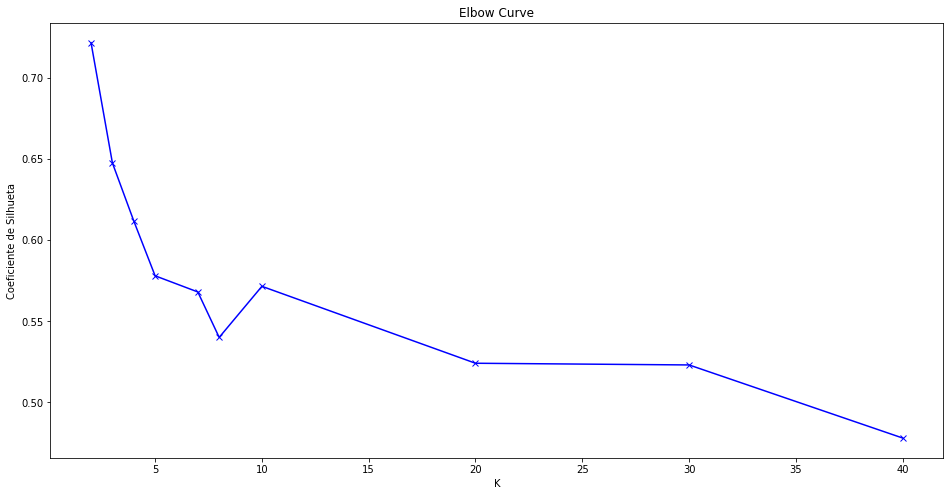

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(valores_k, valores_sil, 'bx-')
plt.xlabel('K')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Elbow Curve')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
valores_ss = StandardScaler().fit_transform(valores)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(valores_ss)
dados2d = pd.DataFrame(data = principalComponents
             , columns = ['Feature 1', 'Feature 2'])

In [ ]:
dados2d

,Feature 1,Feature 2
0,-1.727103,-0.696534
1,-2.029786,0.707674
2,-2.350312,-0.612961
3,-3.323983,1.144404
4,-1.858536,1.137180
...,...,...
995,-1.835148,-1.747240
996,-0.864304,-1.065907
997,4.137721,0.883799
998,1.792926,-1.354510


# ***FEITO APENAS NO ULTIMO KMEAN REALIZADO***

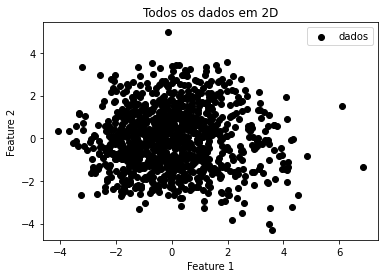

In [ ]:
dados2d = np.asarray(dados2d)
plt.scatter(dados2d[:,0],dados2d[:,1],c='black',label='dados')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Todos os dados em 2D')
plt.show()

No handles with labels found to put in legend.


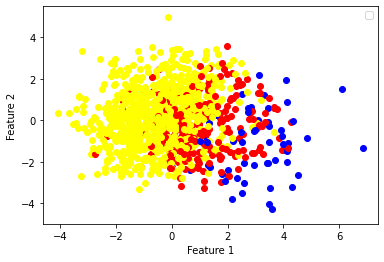

In [ ]:
#COLOQUEI APENAS 10 CORES,SE COLOCAR K > 10 DA RUIM
color=['yellow','red','blue','green','silver','cyan','magenta','teal','brown','black']
j = 0
for i in dados2d:
  plt.scatter(i[0],i[1],c=color[clusters[j]])
  j = j + 1
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim([-5, 5.5])
plt.legend()
plt.show()